In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
file = './Dataset/combined_value_and_volume.csv'
df = pd.read_csv(file, index_col='Unnamed: 0')
df.head()

,Species,Geolocation,Value,Year,Quarter,Volume
0,Milkfish,National Capital Region (NCR),2.853500e+03,2020,Quarter 1,36.370000
1,Milkfish,Cordillera Administrative Region (CAR),3.503092e+04,2020,Quarter 1,351.713333
2,Milkfish,Region I (Ilocos Region),2.721046e+06,2020,Quarter 1,24495.360000
3,Milkfish,Region II (Cagayan Valley),1.623570e+03,2020,Quarter 1,12.950000
4,Milkfish,Region III (Central Luzon),1.159739e+06,2020,Quarter 1,10972.480000


# Univariate Analysis

As for univariate analysis, we can consider analyzing the content or unique values of each available feature in the dataset.

## Species

In [10]:
print(df['Species'].unique())
print(df['Species'].nunique())

['Milkfish' 'Tilapia' 'Tiger Prawn' 'Mudcrab' 'Endeavor Prawn'
 'White Shrimp' 'Grouper' 'Siganid' 'P. Vannamei' 'Spiny Lobster' 'Carp'
 'Catfish' 'Gourami' 'Mudfish' 'Freshwater Prawn' 'Others' 'Oyster'
 'Mussel' 'Seaweed']
19


Based in this set of species, we can see that we only have 19 unique species available in our dataset. This may not include species that are region specific (such as ...).

## Geolocation

In [11]:
print(df['Geolocation'].unique())
print(df['Geolocation'].nunique())

['National Capital Region (NCR)' 'Cordillera Administrative Region (CAR)'
 'Region I (Ilocos Region)' 'Region II (Cagayan Valley)'
 'Region III (Central Luzon)' 'Region IV-A (CALABARZON)' 'MIMAROPA Region'
 'Region V (Bicol Region)' 'Region VI (Western Visayas)'
 'Region VII (Central Visayas)' 'Region VIII (Eastern Visayas)'
 'Region IX (Zamboanga Peninsula)' 'Region X (Nothern Mindanao)'
 'Region XI (Davao Region)' 'Region XII (SOCCSKSARGEN)'
 'Region XIII (Caraga)'
 'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)']
17


As for geolocation, our group included all 17 regions in the Philippines.

As for `Year` and `Quarter`, there won't be any "checks" that would be done since we're dealing with a dataset that contains the data from Jan 2020 - Dec 2024 per quarter.

## Volume

Since `Volume` is a quantitative variable, we can check its statistics.

In [12]:
df['Volume'].describe()

count      6460.000000
mean       3773.630945
std       18949.624362
min           0.000000
25%           1.250000
50%          17.036667
75%         276.959167
max      328205.210000
Name: Volume, dtype: float64

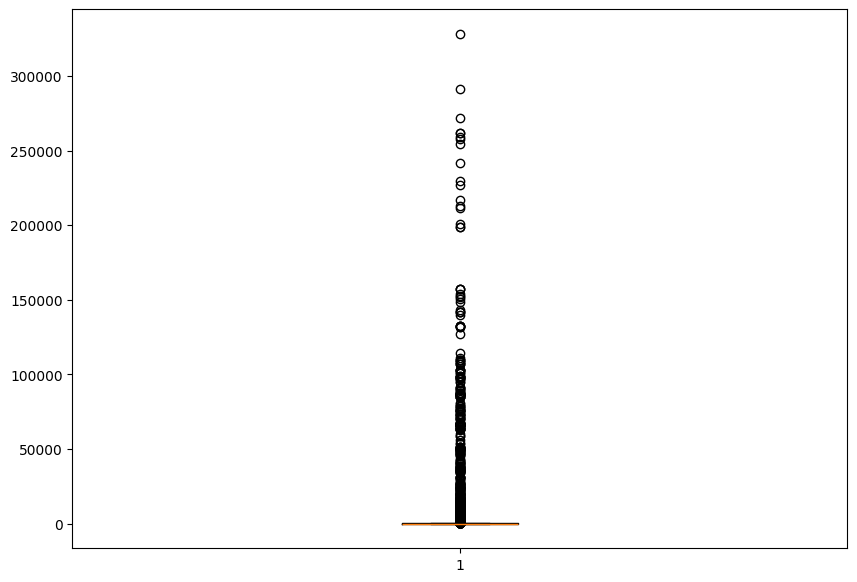

In [13]:
fig = plt.figure(figsize=(10, 7))

plt.boxplot(df['Volume'])
plt.show()

This may not seem like a "very intuitive" box plot but it provides us a view that there's quite a substantial amount of `Volume` data that is "extraneous". It is quite interesting to identify which species contribute to this occurrence or if a certain timeframe lead us to this data.

# Value

We could also utilize the same set of steps done on `Volume` for the `Value` data since they are both quantitative features.

In [14]:
df['Value'].describe()

count    6.460000e+03
mean     1.290199e+05
std      5.149820e+05
min      2.000000e-02
25%      2.144725e+02
50%      2.721182e+03
75%      3.680320e+04
max      9.455618e+06
Name: Value, dtype: float64

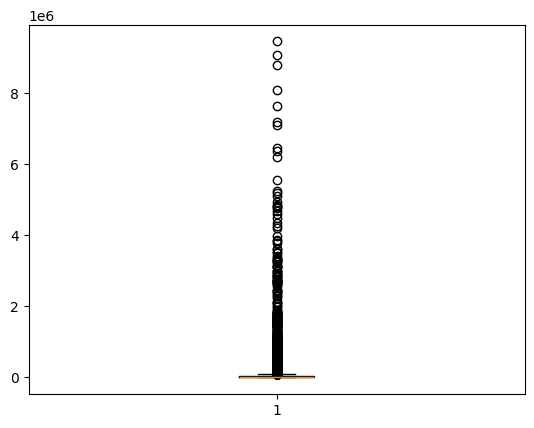

In [15]:
plt.boxplot(df['Value'])
plt.show()

The same set of descriptions could be used to describe the boxplot of the `Value` data. From here, we proceed to check pairings of features for our bivariate analysis. Note that even though we are dealing with time series data, we could instead join `Year` and `Quarter` as one without merging the two columns.

# Bivariate Analysis

As for bivariate analysis, we will be doing a series of plots for pairs that would make sense when paired up.

## Species - Value

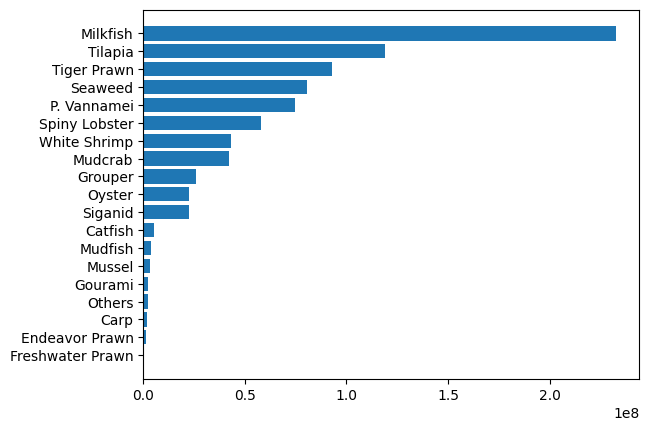

In [16]:
filtered_df = df.groupby(['Species'])['Value'].sum().reset_index().copy()

filtered_df.sort_values(by='Value', ascending=True, inplace=True)

plt.barh(y=filtered_df['Species'], width=filtered_df['Value'], )
plt.show()

We can see that the Milkfish specie contributes to the highest value compared to the remainder. We can infer from here that the Milkfish specie contributes to the extraneous values from our `Value` data earlier. Note that we used `sum` for our grouping in this plot. Let's check if `mean` would have a different plot.

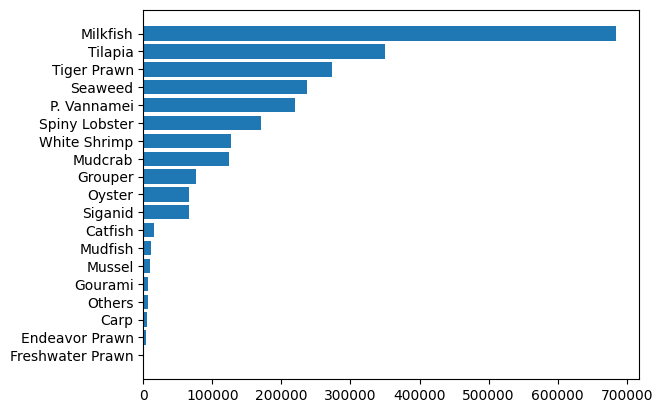

In [17]:
filtered_df = df.groupby(['Species'])['Value'].mean().reset_index().copy()

filtered_df.sort_values(by='Value', ascending=True, inplace=True)

plt.barh(y=filtered_df['Species'], width=filtered_df['Value'], )
plt.show()

As we could, the only change is the shrinking of the x-axis values since each specie has the same number of samples.

## Species - Volume

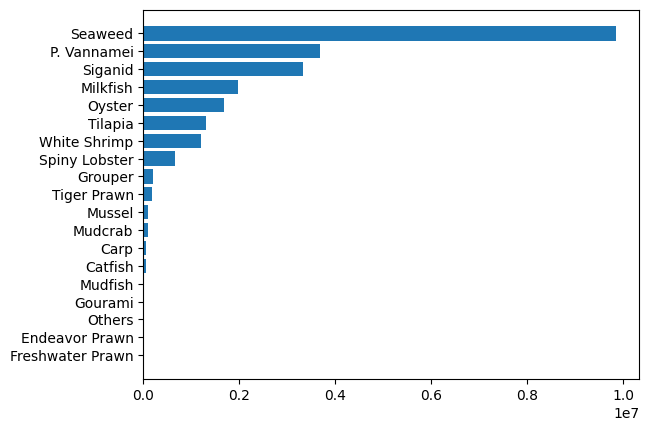

In [18]:
filtered_df = df.groupby(['Species'])['Volume'].sum().reset_index().copy()

filtered_df.sort_values(by='Volume', ascending=True, inplace=True)

plt.barh(y=filtered_df['Species'], width=filtered_df['Volume'], )
plt.show()

## Geolocation - Value

In [19]:
filtered_df = df.groupby(['Geolocation'])['Value'].sum().reset_index().copy()

filtered_df.sort_values(by='Value', ascending=True, inplace=True)

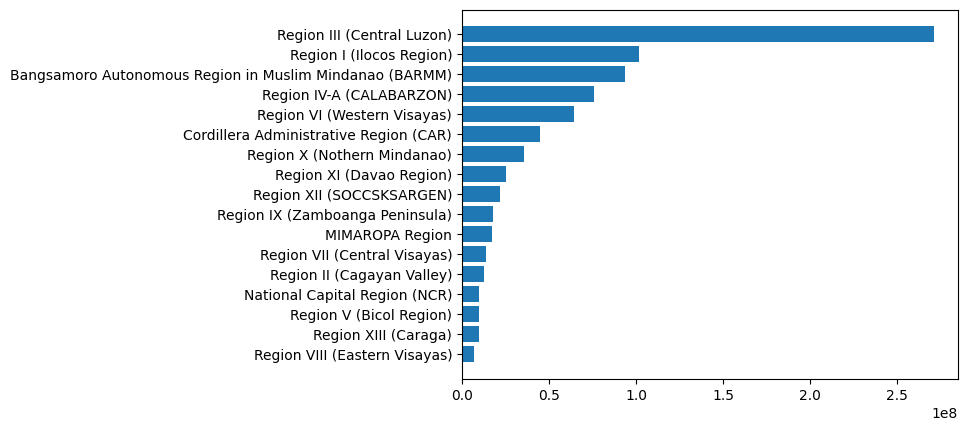

In [20]:
plt.barh(y=filtered_df['Geolocation'], width=filtered_df['Value'], )
plt.show()

This plot is interesting enough since the value prospers in Central Luzon.

## Geolocation - Volume

In [21]:
filtered_df = df.groupby(['Geolocation'])['Volume'].sum().reset_index().copy()

filtered_df.sort_values(by='Volume', ascending=True, inplace=True)

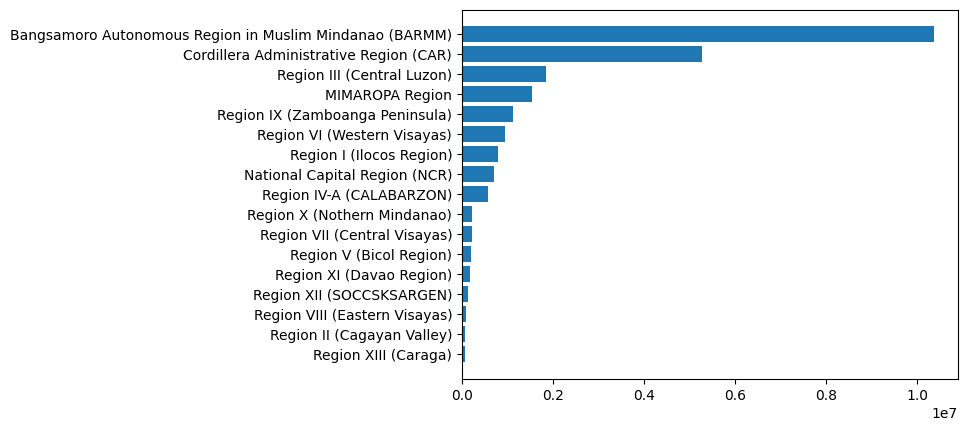

In [22]:
plt.barh(y=filtered_df['Geolocation'], width=filtered_df['Volume'], )
plt.show()

## Value - Year/Quarter

In [23]:
filtered_df = df.groupby(['Year', 'Quarter'])['Value'].sum().reset_index().copy()
filtered_df.sort_values(by=['Year', 'Quarter'], ascending=True, inplace=True)
filtered_df['Year-Quarter'] = filtered_df['Year'].astype(str)+filtered_df['Quarter']

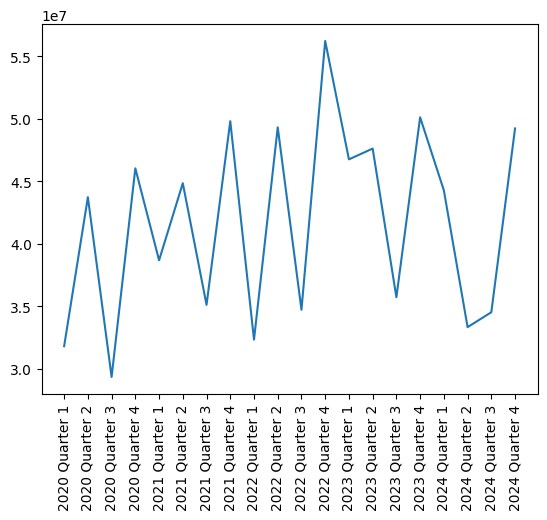

In [24]:
plt.plot(filtered_df['Year-Quarter'], filtered_df['Value'])
plt.xticks(rotation=90)
plt.show()

## Volume - Year/Quarter

In [25]:
filtered_df = df.groupby(['Year', 'Quarter'])['Volume'].sum().reset_index().copy()
filtered_df.sort_values(by=['Year', 'Quarter'], ascending=True, inplace=True)
filtered_df['Year-Quarter'] = filtered_df['Year'].astype(str)+filtered_df['Quarter']

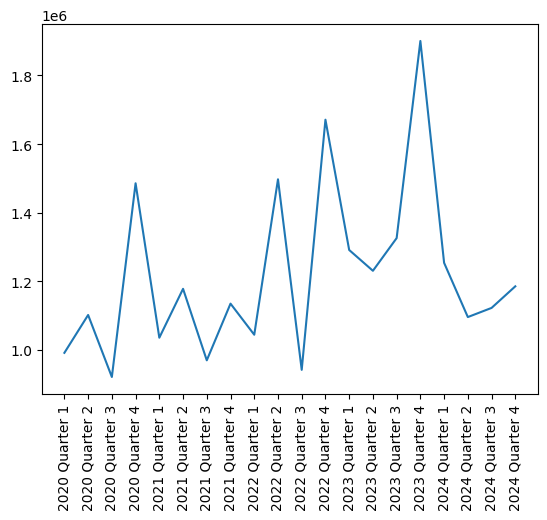

In [26]:
plt.plot(filtered_df['Year-Quarter'], filtered_df['Volume'])
plt.xticks(rotation=90)
plt.show()

## Value - Volume

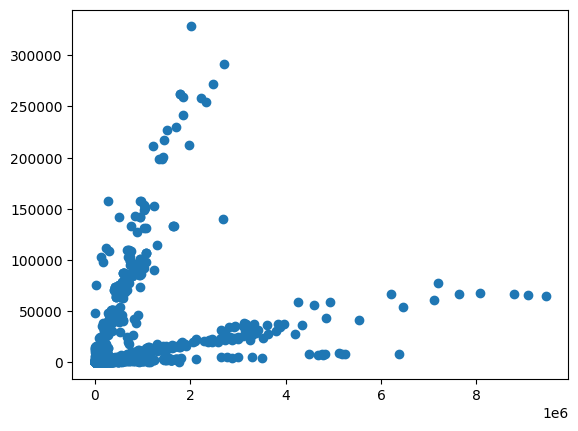

In [27]:
plt.scatter(df['Value'], df['Volume'])
plt.show()

For this plot, there's a discrepancy that could be inferred. Two plots, one going upward and the other slowly curving downward, could be seen.

# Multivariate Analysis

Now that we've plotted pairs of features, we proceed to analyzing multivariate cases.

## Value - Year/Quarter per Species

In [40]:
import seaborn as sns

def plot(type, v):
    adjusted_df = df.copy()
    adjusted_df = adjusted_df.groupby(['Year', 'Quarter', type])[v].sum().reset_index().copy()
    adjusted_df.sort_values(by=['Year', 'Quarter'], ascending=True, inplace=True)
    adjusted_df['Year-Quarter'] = adjusted_df['Year'].astype(str)+adjusted_df['Quarter']
    pivot_table = adjusted_df.pivot(index=type, columns='Year-Quarter', values=v)

    formatted_pivot = pivot_table.applymap(lambda x: f"{x:.2g}" if pd.notnull(x) else "")

    plt.figure(figsize=(15, 6))
    sns.heatmap(pivot_table, annot=formatted_pivot, cmap="YlGnBu", fmt="", annot_kws={"size": 7})  # annot=True shows numbers inside
    plt.title('Fish Species Value per Month/Year')
    plt.xlabel('Month/Year')
    plt.ylabel('Species')
    plt.show()

C:\Users\Justin Clyde\AppData\Local\Temp\ipykernel_25408\1801550303.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



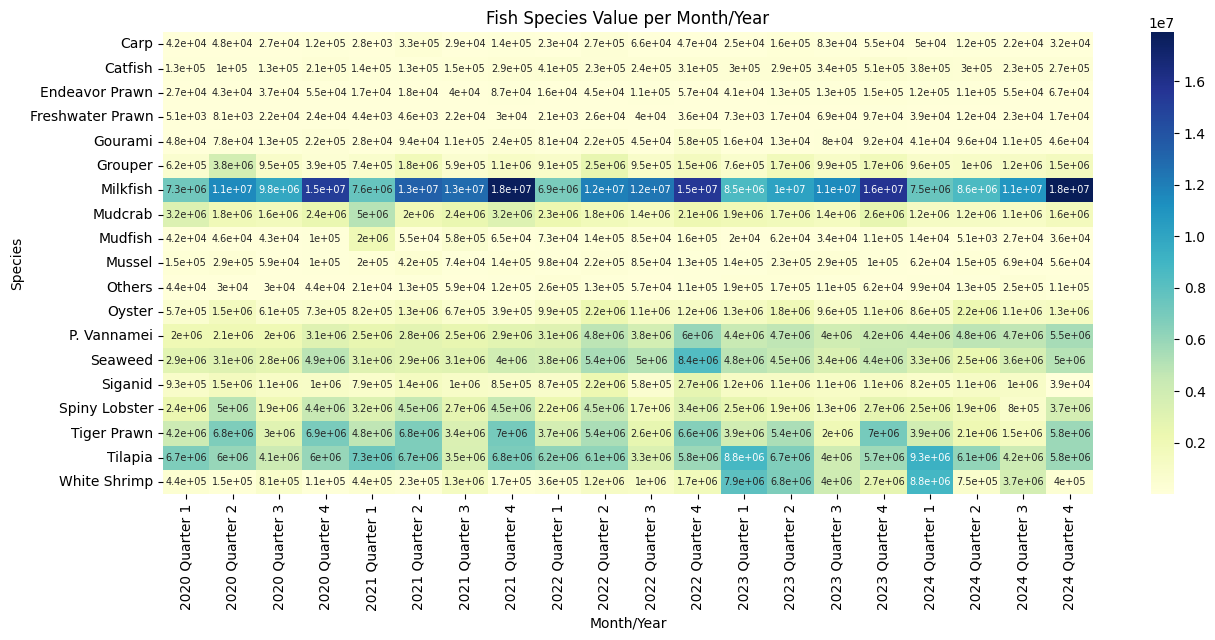

In [41]:
plot("Species", "Value")

## Value - Year/Quarter per Region

C:\Users\Justin Clyde\AppData\Local\Temp\ipykernel_25408\1801550303.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



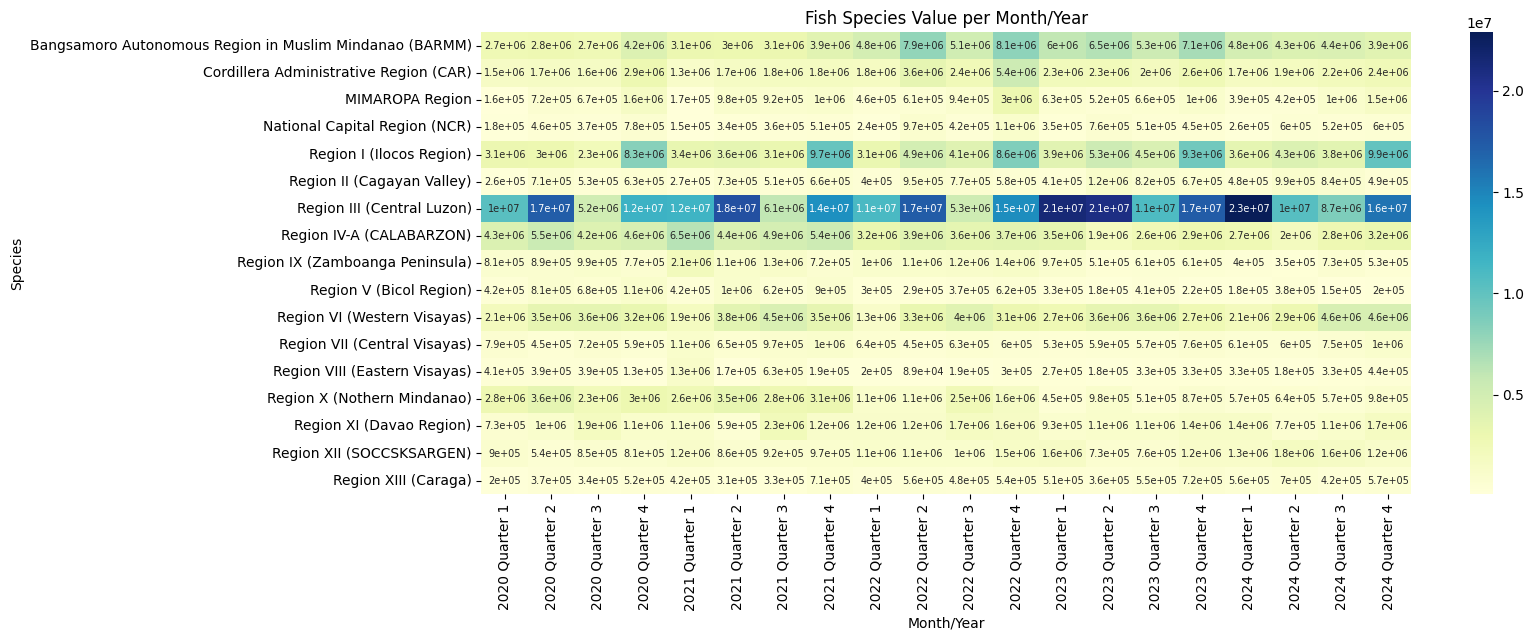

In [42]:
plot("Geolocation", "Value")

## Volume - Year/Quarter per Species

C:\Users\Justin Clyde\AppData\Local\Temp\ipykernel_25408\1801550303.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



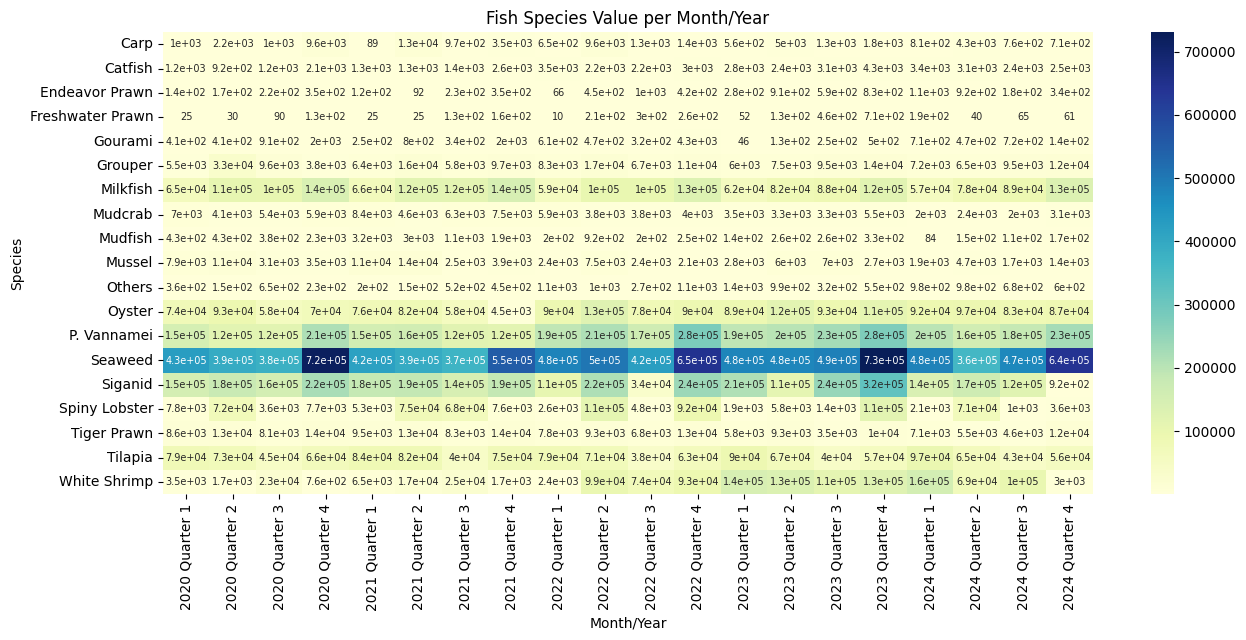

In [43]:
plot("Species", "Volume")

## Volume - Year/Quarter per Region

C:\Users\Justin Clyde\AppData\Local\Temp\ipykernel_25408\1801550303.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



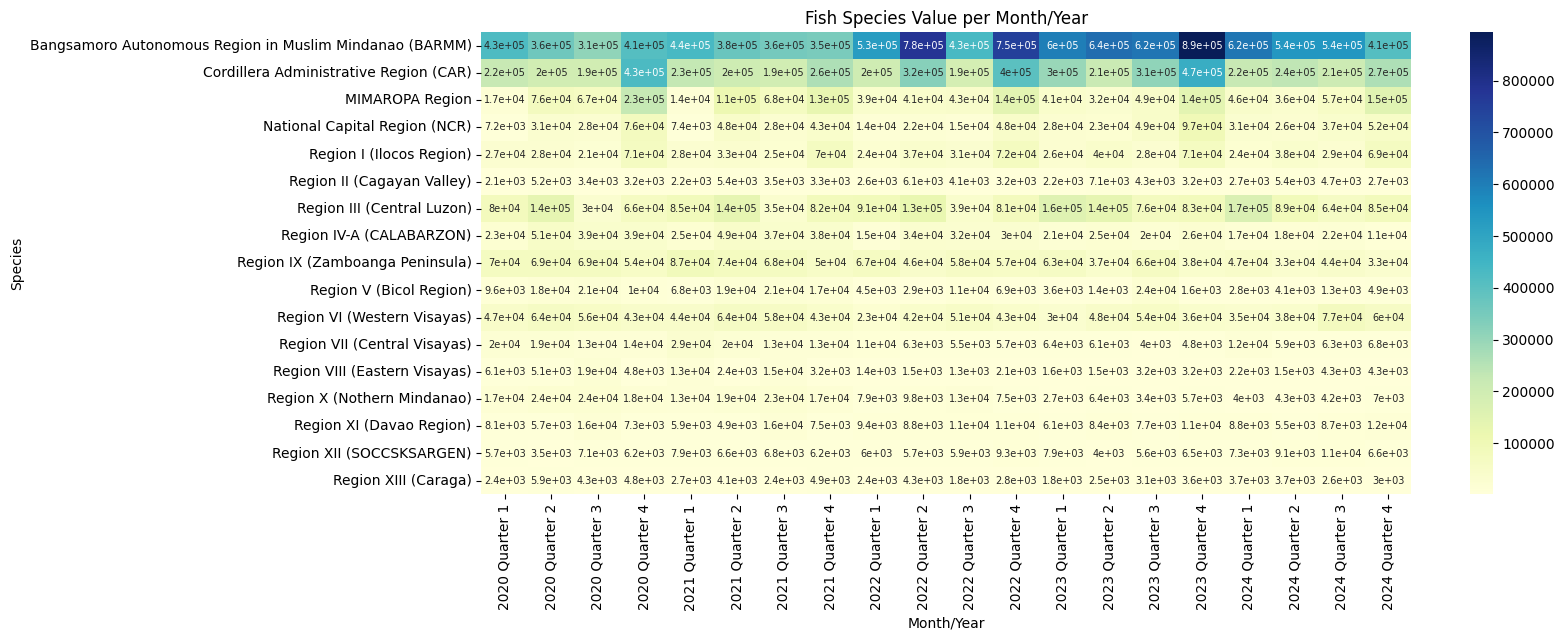

In [44]:
plot("Geolocation", "Volume")

# Hypothesis Testing

## Research Question 1

Does an increase in aquaculture production volume lead to a corresponding increase in its economic value?

`Ho`: There is no significant correlation between aquaculture volume and value.

`Ha`: There is a significant correlation between aquaculture volume and value.

For the first research question, we want to identify if there is a signification correlation between the two quantitative values. Given the nature of these two features, we proceed on using F-test for linear regression to test our hypothesis.

Note that we had already provided a scatter plot showing the graph of `Value` vs `Volume` on our bivariate analysis but we have no direct identifier on what the relationship is between these two values.

In [ ]:
from statsmodels.regression import linear_model
from statsmodels.api import add_constant

X = df['Volume'].values
Y = add_constant(df['Value'].values)

model = linear_model.OLS(X, Y)
linear_reg = model.fit()

print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     1391.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):          6.59e-276
Time:                        16:02:24   Log-Likelihood:                -72164.
No. Observations:                6460   AIC:                         1.443e+05
Df Residuals:                    6458   BIC:                         1.443e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1775.0359    220.486      8.051      0.0

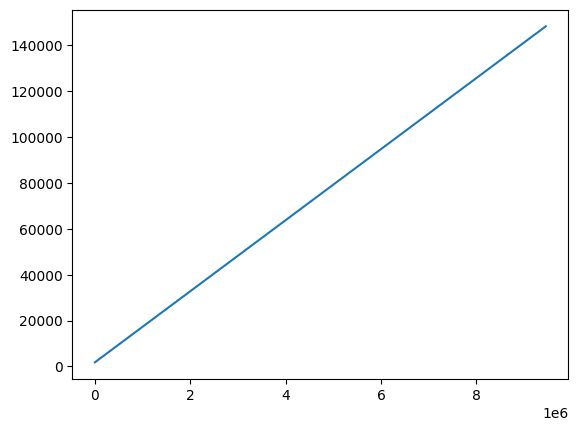

In [ ]:
coef, intercept = linear_reg.params[1], linear_reg.params[0]

X, y = [i for i in sorted(df['Value'].values)], [j for j in sorted((df['Value']*coef + intercept).values)]

plt.plot(X,y, label='y')
plt.show()

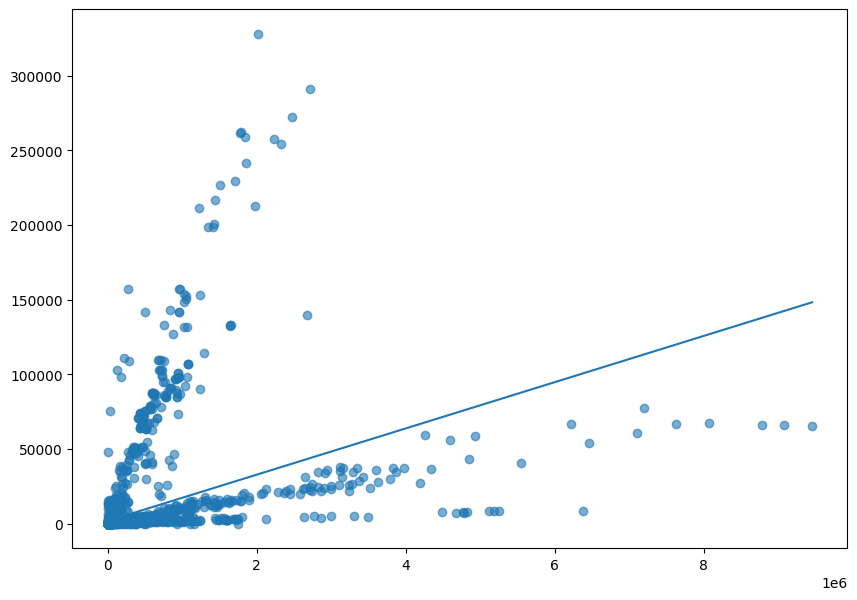

In [ ]:

plt.figure(figsize=(10,7))
plt.scatter(df['Value'], df['Volume'], alpha=0.6, label='X')
plt.plot(X,y, label='y')
plt.show()

Given the summary results provided from our OLS regression, we conclude that we should reject the null hypothesis with $P > |t|$, t-statistic value of 37.296 which is large, and with the 95% confidence interval [0.015, 0.016] not including zero which means that there is a positive correlation between the two.

If we were to add another layer of complexion to this graph (i.e. specie) and divide the whole into two, we would be able to identify two different relationships based on two clustering.

## Research Question 1 - Additional Problem

Given this discovery, we intend to identify this grouping through clustering.

## Is this worth testing???

## Research Question 2

Is there a significant difference in aquaculture volume across different regions in the Ph?

`Ho`: There is no significant difference in aquaculture volume across different regions in the Philippines.

`Ha`: There is a significant difference in aquaculture volume across different regions in the Philippines.

For this research question, we are dealing with a categorical variable as a predictor and a quantitative outcome variable so it is safe to say we will be using Kruskal Wallis test for hypothesis testing.

In [ ]:
from scipy import stats
 
# Conduct the Kruskal-Wallis Test 
h_stat, p_value = stats.kruskal(*[df[df['Geolocation'] == group]['Value'] for group in df['Geolocation'].unique()])
 
# Print the result
print(h_stat, p_value)

378.0918364224094 1.4068155377773828e-70


Given the H value of 378 which is very large and a p value of $1.41\times 10^{-70}$, we reject the null hypothesis. Thus, there is a significant difference in aquaculture volume across different regions in the Philippines.

## Research Question 3

Is there a significant trend in the volume of aquaculture production in the Philippines over the years?

`Ho`: There is no significant trend in the volume of aquaculture in the Philippines over the years.

`Ha`: There is a significant trend in the volume of aquaculture in the Philippines over the years.

Similar to the previous research question, we are dealing with a categorical predictor and a quantitative outcome variable. From this, we proceed to utilize Kruskal Wallis ANOVA for the hypothesis testing.

In [ ]:
from scipy import stats
 
# Conduct the Kruskal-Wallis Test 
h_stat, p_value = stats.kruskal(*[df[df['Year'] == year]['Value'] for year in df['Year'].unique()])
 
# Print the result
print(h_stat, p_value)

37.67696199371281 1.3063515696384751e-07


Given the H value of 37.7 which is quite large and a p value of $1.31\times 10^{-7}$, we also reject the null hypothesis. Thus, there is a significant difference in aquaculture volume over the years.

# References:

Hypothesis Test for Linear Regression. (March 13, 2023) https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Mostly_Harmless_Statistics_(Webb)/12%3A_Correlation_and_Regression/12.02%3A_Simple_Linear_Regression/12.2.01%3A_Hypothesis_Test_for_Linear_Regression